# python Data Analysis

## python modules ##

important modules, (install cmd: pip install)
* science computing [numpy, doc and official webpage](https://numpy.org/) 
* pandas [doc and official webpage](https://pandas.pydata.org/)
* plot and view tools, [matplotlib, doc and official webpage](https://matplotlib.org/)
* stock share tools [tushare pro](https://waditu.com/document/1?doc_id=37)
* stock K line plot[mplfinance], mpl_finance is deprecated [mpl_finance](https://github.com/matplotlib/mplfinance/archive/master.zip)

In [39]:
#example tushare and matplotlib

import tushare as ts
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns

sns.set()

print(ts.__version__)

1.2.62


## get stock data by Tushare

In [11]:
df =ts.get_k_data('000002','2019-06-01','2019-09-30')
#本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


In [6]:
df.head(5)

,date,open,close,high,low,volume,code
99,2019-06-03,26.81,26.44,27.02,26.28,317567.0,000002
100,2019-06-04,26.47,26.30,26.54,26.25,203260.0,000002
101,2019-06-05,26.64,27.03,27.28,26.63,576164.0,000002
102,2019-06-06,27.01,27.12,27.29,26.92,333792.0,000002
103,2019-06-10,27.29,27.81,28.05,27.17,527547.0,000002


In [12]:
# get data with tushare pro

# init Tushare
ts.set_token('6195fc7c4f353480e2106c1b39c81a0226bac0d8c03ceb8da1eecf10')
pro = ts.pro_api()

# pro = ts.pro_api('Your token')

## tushare pro 以获取交易日历信息为例 方法1：##

In [13]:
df = pro.trade_cal(exchange='', start_date='20180901', 
                   end_date='20181001', 
                   fields='exchange,cal_date,is_open,pretrade_date',
                   is_open='0')

In [14]:
df.head(5)

,exchange,cal_date,is_open,pretrade_date
0,SSE,20180901,0,20180831
1,SSE,20180902,0,20180831
2,SSE,20180908,0,20180907
3,SSE,20180909,0,20180907
4,SSE,20180915,0,20180914


## tushare pro 以获取交易日历信息为例 方法2：##

In [16]:
df = pro.query('trade_cal', exchange='',
               start_date='20180901', end_date='20181001', 
               fields='exchange,cal_date,is_open,pretrade_date', is_open='0')

df.head(5)

,exchange,cal_date,is_open,pretrade_date
0,SSE,20180901,0,20180831
1,SSE,20180902,0,20180831
2,SSE,20180908,0,20180907
3,SSE,20180909,0,20180907
4,SSE,20180915,0,20180914


## tushare api ##
### 接口：stock_basic ###
* 描述：获取基础信息数据，包括股票代码、名称、上市日期、退市日期等
* 输入参数
|名称|类型|必选|描述       |
|----|----|----|:----------|
|ts_code|str|N|股票代码|
|list_status|str|N|上市状态： L上市 D退市 P暂停上市，默认L|
|exchange|str|N|交易所 SSE上交所 SZSE深交所 HKEX港交所(未上线)|
|is_hs|str|N|是否沪深港通标的，N否 H沪股通 S深股通|


In [17]:
#查询当前所有正常上市交易的股票列表

data = pro.stock_basic(exchange='', list_status='L', fields='ts_code,symbol,name,area,industry,list_date')

In [18]:
data.head()

,ts_code,symbol,name,area,industry,list_date
0,000001.SZ,000001,平安银行,深圳,银行,19910403
1,000002.SZ,000002,万科A,深圳,全国地产,19910129
2,000004.SZ,000004,国华网安,深圳,互联网,19910114
3,000005.SZ,000005,世纪星源,深圳,环境保护,19901210
4,000006.SZ,000006,深振业A,深圳,区域地产,19920427


### 接口：trade_cal ###
* 描述：获取各大交易所交易日历数据,默认提取的是上交所
* 输入参数

|名称|类型|必选|描述       |
|----|----|----|:----------|
|exchange|str|N|交易所 SSE上交所,SZSE深交所,CFFEX 中金所,SHFE 上期所,CZCE 郑商所,DCE 大商所,INE 上能源|
|start_date|str|N|开始日期 （格式：YYYYMMDD 下同）|
|end_date|str|N|结束日期|
|is_open|str|N|是否交易 '0'休市 '1'交易|

* code example

```python
df = pro.trade_cal(exchange='', start_date='20180101', end_date='20181231')
```
或者
```python
df = pro.query('trade_cal', start_date='20180101', end_date='20181231')
```

### 接口：hs_const###
* 描述：获取沪股通、深股通成分数据
* 输入参数

|名称|类型|必选|描述       |
|----|----|----|:----------|
|hs_type|str|Y|类型SH沪股通SZ深股通|
|is_new|str|N|是否最新 1 是 0 否 (默认1)|


In [19]:
#获取沪股通成分
df = pro.hs_const(hs_type='SH') 

#获取深股通成分
df = pro.hs_const(hs_type='SZ')

df

,ts_code,hs_type,in_date,out_date,is_new
0,002910.SZ,SZ,20171114,None,1
1,000016.SZ,SZ,20180102,None,1
2,001872.SZ,SZ,20180102,None,1
3,000040.SZ,SZ,20180102,None,1
4,000401.SZ,SZ,20180102,None,1
5,000429.SZ,SZ,20180102,None,1
6,000553.SZ,SZ,20180102,None,1
7,000560.SZ,SZ,20180102,None,1
8,000710.SZ,SZ,20180102,None,1
9,000723.SZ,SZ,20180102,None,1


### 接口：stock_company###

* 描述：获取上市公司基础信息，单次提取4000条，可以根据交易所分批提取积分：用户需要至少120积分才可以调取，具体请参阅积分获取办法 
* 输入参数

|名称|类型|必选|描述       |
|----|----|----|:----------|
|ts_code|str|N|股票代码|
|exchange|str|N|交易所代码 ，SSE上交所 SZSE深交所|


In [20]:
#example 上市基本信息
df = pro.stock_company(exchange='SZSE', fields='ts_code,chairman,manager,secretary,reg_capital,setup_date,province')

In [21]:
df

,ts_code,chairman,manager,secretary,reg_capital,setup_date,province
0,300430.SZ,梁凯,梁凯,邱义鹏,27200.8896,20030722,北京
1,300333.SZ,魏恺言,魏恺言,余凯,33600.0000,20030416,广东
2,002953.SZ,冯就景,李强,孟兆滨,17387.9128,20091217,广东
3,003030.SZ,蔡祖明,蔡祖明,高锋,12478.0000,20000218,浙江
4,300550.SZ,杨一兵,戴泽宇,章逸,18992.9258,20101026,浙江
5,300392.SZ,田炳信,田炳信,田炳信,38400.0000,20011206,北京
6,300458.SZ,张建辉,李龙生,蔡霄鹏,33061.0757,20070919,广东
7,002712.SZ,任丁,俞建华,李子木,58120.2488,20000809,浙江
8,300454.SZ,何朝曦,何朝曦,蒋文光,41381.6528,20001225,广东
9,300246.SZ,燕金元,燕金元,杨永兴,14608.8000,19930628,广东


In [22]:
df.shape

(2437, 7)

### 行情数据 ###
Tushare行情数据目前已经具备高可用高稳定性，提供了包括股票、指数、基金、期货等在内的质量比较高的日线行情和分钟行情。而且也像老版本中ts.bar接口一样，提供了一个统一的行情数据输出标准接口。[online document](https://waditu.com/document/2?doc_id=15)

* 分钟行情
* 日线行情
* 周线行情
* 月线行情
* 复权行情
* 复权因子
* 停复牌信息
* 每日行情指标
* 通用行情接口

### 财务数据 ###
Pro版的财务数据跟旧版有着明显的差异，Pro提供的是完整的财务指标和全部历史数据，同时也提供质量比较高的业绩预告和业绩快报数据。我们将继续完善和充实财务指标，为大家提供更全面的反映上市公司基本面情况的数据，希望大家愉快的使用。
目前提供的主要接口有：
* 利润表
* 资产负债表
* 现金流量表
* 业绩预告
* 业绩快报

[online doc](https://waditu.com/document/2?doc_id=16)

#### 接口：daily###
数据说明：交易日每天15点～16点之间。本接口是未复权行情，停牌期间不提供数据。
调取说明：基础积分每分钟内最多调取500次，每次5000条数据，相当于23年历史，用户获得超过5000积分正常调取无频次限制。
* 描述：获取股票行情数据，或通过通用行情接口获取数据，包含了前后复权数据。
* 输入参数

|名称|类型|必选|描述       |
|----|----|----|:----------|
|ts_code|str|N|股票代码（支持多个股票同时提取，逗号分隔）|
|trade_date|str|N|交易日期（YYYYMMDD）|
|start_date|str|N|开始日期(YYYYMMDD)|
|end_date|str|N|结束日期(YYYYMMDD)|

> 注：日期都填YYYYMMDD格式，比如20181010

In [40]:
# init Tushare
ts.set_token('6195fc7c4f353480e2106c1b39c81a0226bac0d8c03ceb8da1eecf10')
pro = ts.pro_api()

df = pro.daily(ts_code='000001.SZ', start_date='20180701', end_date='20180718')

#多个股票
df = pro.daily(ts_code='000001.SZ,600000.SH', start_date='20180701', end_date='20180718')

In [25]:
df.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,600000.SH,20180718,9.51,9.64,9.48,9.51,9.44,0.07,0.74,189227.00,180858.003
1,000001.SZ,20180718,8.75,8.85,8.69,8.70,8.72,-0.02,-0.23,525152.77,460697.377
2,000001.SZ,20180717,8.74,8.75,8.66,8.72,8.73,-0.01,-0.11,375356.33,326396.994
3,600000.SH,20180717,9.41,9.48,9.38,9.44,9.41,0.03,0.32,137134.95,129512.091
4,000001.SZ,20180716,8.85,8.90,8.69,8.73,8.88,-0.15,-1.69,689845.58,603427.713


In [41]:
df[df['ts_code']=='600000.SH']

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,600000.SH,20180718,9.51,9.64,9.48,9.51,9.44,0.07,0.74,189227.00,180858.003
3,600000.SH,20180717,9.41,9.48,9.38,9.44,9.41,0.03,0.32,137134.95,129512.091
5,600000.SH,20180716,9.50,9.54,9.34,9.41,9.49,-0.08,-0.84,144141.19,135697.106
6,600000.SH,20180713,9.57,9.58,9.46,9.49,9.47,0.02,0.21,150263.39,142708.347
9,600000.SH,20180712,9.41,9.61,9.39,9.57,9.38,0.19,2.03,197048.37,188206.858
11,600000.SH,20180711,9.37,9.44,9.32,9.38,9.57,-0.19,-1.99,152039.33,142450.919
13,600000.SH,20180710,9.61,9.65,9.50,9.57,9.60,-0.03,-0.31,124028.37,118668.133
15,600000.SH,20180709,9.37,9.63,9.37,9.60,9.37,0.23,2.45,221725.65,212109.327
16,600000.SH,20180706,9.31,9.43,9.17,9.37,9.26,0.11,1.19,225944.43,210564.106
18,600000.SH,20180705,9.26,9.35,9.22,9.26,9.31,-0.05,-0.54,164954.38,152978.661


## matplotlib example

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.ft2font import FT2Font
import re as re

for fnt in fm.findSystemFonts():
    if re.match('.*san.*',fnt,re.I):
        print(fnt)
    if re.match('.*sim*',fnt,re.I):
        print(fnt)
print(fm.FontProperties())
#print(plt.rcParams.keys())
#print((fm.get_fontconfig_fonts('.*san.*')))
#print(fm.get_font('*san*'))

C:\WINDOWS\Fonts\REFSAN.TTF
C:\Windows\Fonts\LSANS.TTF
C:\WINDOWS\Fonts\LSANSI.TTF
C:\WINDOWS\Fonts\LSANSI.TTF
C:\WINDOWS\Fonts\timesi.ttf
C:\WINDOWS\Fonts\LSANS.TTF
C:\Windows\Fonts\LSANSI.TTF
C:\Windows\Fonts\LSANSI.TTF
C:\WINDOWS\Fonts\LSANSDI.TTF
C:\Windows\Fonts\GOUDOSI.TTF
C:\Windows\Fonts\LSANSDI.TTF
C:\Windows\Fonts\LSANSD.TTF
C:\Windows\Fonts\REFSAN.TTF
C:\WINDOWS\Fonts\simsunb.ttf
C:\Windows\Fonts\BOOKOSI.TTF
C:\Windows\Fonts\simsunb.ttf
C:\Windows\Fonts\timesi.ttf
C:\WINDOWS\Fonts\BOOKOSI.TTF
C:\WINDOWS\Fonts\GILSANUB.TTF
C:\Windows\Fonts\HARLOWSI.TTF
C:\Windows\Fonts\GILSANUB.TTF
C:\WINDOWS\Fonts\LSANSD.TTF
C:\WINDOWS\Fonts\GOUDOSI.TTF
C:\Windows\Fonts\TEMPSITC.TTF
C:\WINDOWS\Fonts\HARLOWSI.TTF
C:\WINDOWS\Fonts\TEMPSITC.TTF
:family=SimHei:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0


No handles with labels found to put in legend.
C:\Users\chunxia\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


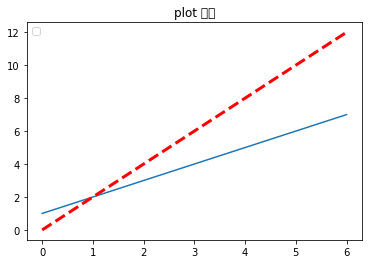

In [33]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.array([0,1,2,3,4,5,6])

# line 1: y = x + 1
y1 = x1 + 1
plt.plot(x1,y1) # default settings

# Line 2: y = x * 2
y2 = x1 * 2

# color, linewidth in pixel, linestyle, default is solid
plt.plot(x1,y2,color='red', linewidth=3,
        linestyle='--')

# example of bar
x2 = [1,2,3,4,5]
y3 = [5,4,3,2,1]
#plt.bar(x2,y3,color='cyan')
# 设置图例
plt.legend(loc='upper left')
# example of text 中文
plt.rcParams['font.family']=['SimHei']#解决正常中文显示问题
plt.rcParams['axes.unicode_minus']=False #解决负号显示为方块的问题
plt.title('plot 示例')
plt.show()


## plot candle K-line

In [46]:
# Example close price curve
df = pro.daily(ts_code='000001.SZ', start_date='20180701', end_date='20180718')

#多个股票
#df = pro.daily(ts_code='000001.SZ,600000.SH', start_date='20180701', end_date='20180718')

df.set_index('trade_date',inplace=True)
df.head()


,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,
20180718,000001.SZ,8.75,8.85,8.69,8.70,8.72,-0.02,-0.23,525152.77,460697.377
20180717,000001.SZ,8.74,8.75,8.66,8.72,8.73,-0.01,-0.11,375356.33,326396.994
20180716,000001.SZ,8.85,8.90,8.69,8.73,8.88,-0.15,-1.69,689845.58,603427.713
20180713,000001.SZ,8.92,8.94,8.82,8.88,8.88,0.00,0.00,603378.21,535401.175
20180712,000001.SZ,8.60,8.97,8.58,8.88,8.64,0.24,2.78,1140492.31,1008658.828


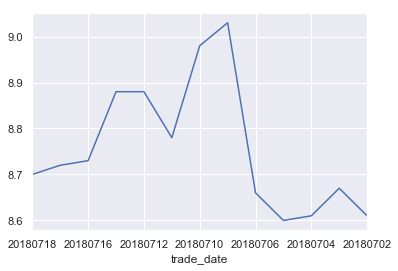

In [49]:
# plot by df methods
df['close'].plot()

### Tushare date converting
如果得到日期是字符串，转换成日期类型会让坐标显示更清晰
Tushare 得到的数据中日期trade_date是date。

<class 'pandas.core.series.Series'>


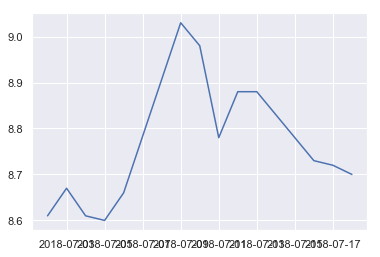

In [53]:
#
from datetime import datetime

df = pro.daily(ts_code='000001.SZ', start_date='20180701', end_date='20180718')
print(type(df['trade_date']))
df['trade_date']=df['trade_date'].apply(lambda x: datetime.strptime(x,'%Y%m%d'))

plt.plot(df['trade_date'],df['close'])
plt.show()

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 11 columns):
ts_code       13 non-null object
trade_date    13 non-null datetime64[ns]
open          13 non-null float64
high          13 non-null float64
low           13 non-null float64
close         13 non-null float64
pre_close     13 non-null float64
change        13 non-null float64
pct_chg       13 non-null float64
vol           13 non-null float64
amount        13 non-null float64
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 1.2+ KB


[['000001.SZ' Timestamp('2018-07-18 00:00:00') 8.75 8.85 8.69 8.7 8.72
  -0.02 -0.23 525152.77 460697.377]
 ['000001.SZ' Timestamp('2018-07-17 00:00:00') 8.74 8.75 8.66 8.72 8.73
  -0.01 -0.11 375356.33 326396.994]
 ['000001.SZ' Timestamp('2018-07-16 00:00:00') 8.85 8.9 8.69 8.73 8.88
  -0.15 -1.69 689845.58 603427.713]
 ['000001.SZ' Timestamp('2018-07-13 00:00:00') 8.92 8.94 8.82 8.88 8.88
  0.0 0.0 603378.21 535401.175]
 ['000001.SZ' Timestamp('2018-07-12 00:00:00') 8.6 8.97 8.58 8.88 8.64
  0.24 2.78 1140492.31 1008658.828]
 ['000001.SZ' Timestamp('2018-07-11 00:00:00') 8.76 8.83 8.68 8.78 8.98
  -0.2 -2.23 851296.7 744765.824]
 ['000001.SZ' Timestamp('2018-07-10 00:00:00') 9.02 9.02 8.89 8.98 9.03
  -0.05 -0.55 896862.02 803038.965]
 ['000001.SZ' Timestamp('2018-07-09 00:00:00') 8.69 9.03 8.68 9.03 8.66
  0.37 4.27 1409954.6 1255007.609]
 ['000001.SZ' Timestamp('2018-07-06 00:00:00') 8.61 8.78 8.45 8.66 8.6
  0.06 0.7 988282.69 852071.526]
 ['000001.SZ' Timestamp('2018-07-05 00:00:

AttributeError: module 'mplfinance' has no attribute 'candlestick_ochl'

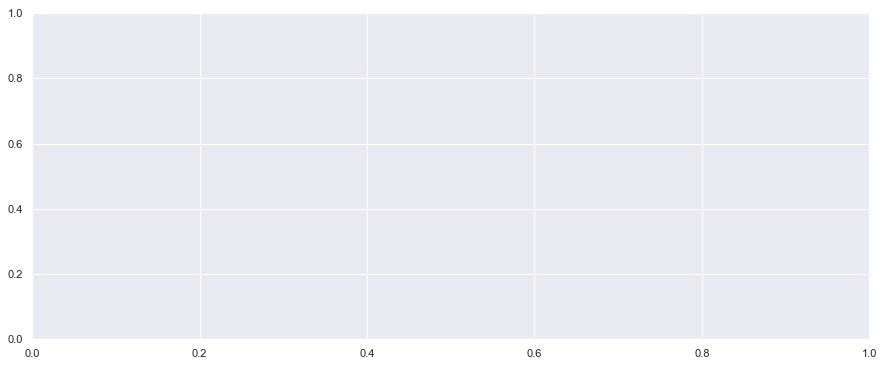

In [68]:
#example tushare and matplotlib，k-line

import tushare as ts
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns

sns.set()
#将DataFrame转换成二维数组，
df_arr =df.values
print(df_arr)
#df_arr[:,0]=[datetime.strptime(x,'%Y%m%d') for x in df_arr[:,0]]



fig,ax= plt.subplots(figsize=(15,6))
mpf.candlestick_ochl(ax,df_arr,width=0.6,
                    colorup='r',
                    colordown='g',
                    alpha=1.0)# plot k-line
